In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from graphufs.stacked_utils import convert_loss_channel2var
from prototypes.ocn_only.R0.config import OcnTrainer as Emulator 

In [2]:
_scratch = "/pscratch/sd/n/nagarwal"
_prototype = "ocn-only"
_expt = "R0"
_prototypes = "/global/homes/n/nagarwal/graph-ufs/prototypes/"

In [4]:
# open loss
ds = xr.open_dataset(os.path.join(_scratch, _prototype, _expt, "loss.nc"))
ds.load()

<xarray.Dataset> Size: 969kB
Dimensions:                (optim_step: 4746, epoch: 2, channel: 43)
Coordinates:
  * optim_step             (optim_step) int64 38kB 0 1 2 3 ... 4743 4744 4745
  * epoch                  (epoch) int64 16B 1 2
  * channel                (channel) int64 344B 0 1 2 3 4 5 ... 38 39 40 41 42
Data variables:
    loss                   (optim_step) float32 19kB 1.613 1.615 ... 0.3661
    loss_by_channel        (optim_step, channel) float32 816kB 0.0277 ... 0.0...
    loss_by_channel_valid  (epoch, channel) float32 344B 0.007283 ... 0.01426
    loss_avg               (epoch) float32 8B 0.5644 0.3599
    loss_valid             (epoch) float32 8B 0.4812 0.4236
    mgrad                  (epoch) float32 8B 6.877e-05 8.907e-05
    g_norm                 (optim_step) float64 38kB nan nan nan ... nan nan nan
    learning_rate          (optim_step) float32 19kB 0.0 1e-06 ... 0.000999
    epoch_label            (optim_step) float64 38kB 1.0 1.0 1.0 ... 2.0 2.0 2.0
Attributes:
    batch_size:  16

In [5]:
# covert channel loss to var loss
var_loss = convert_loss_channel2var(Emulator, ds.loss_by_channel)
var_loss

<xarray.Dataset> Size: 854kB
Dimensions:     (optim_step: 4746, z_l: 10)
Coordinates:
  * optim_step  (optim_step) int64 38kB 0 1 2 3 4 5 ... 4741 4742 4743 4744 4745
  * z_l         (z_l) float64 80B 0.5154 2.765 7.648 15.95 ... 152.1 271.2 417.7
Data variables:
    LW          (optim_step) float32 19kB 0.0277 0.0256 ... 0.006746 0.00685
    SSH         (optim_step) float32 19kB 0.03022 0.02904 ... 0.005091 0.005646
    SW          (optim_step) float32 19kB 0.02975 0.03348 ... 0.0005486
    so          (z_l, optim_step) float32 190kB 0.05956 0.05821 ... 0.01555
    temp        (z_l, optim_step) float32 190kB 0.03373 0.0338 ... 0.01357
    uo          (z_l, optim_step) float32 190kB 0.02775 0.02871 ... 0.0093
    vo          (z_l, optim_step) float32 190kB 0.02729 0.0292 ... 0.009553

In [33]:
def plot_loss_3d(var, extended_name):

    fig, ax = plt.subplots(2, 5, figsize=(20,8), sharey=True)
    
    for i in range(var_loss.dims["z_l"]):
        ax_i = int(i/5); ax_j = int(i%5)
        ax[ax_i][ax_j].plot(var_loss[var].isel(z_l=i))
        ax[ax_i][ax_j].set_title(f"z_l={var_loss.coords['z_l'][i].values:.2f}")

    figname = f"train_loss_nepochs-{ds.sizes['epoch']}_{extended_name}_{_prototype}.png"
    figloc = os.path.join(_prototypes, _prototype.replace('-','_'), _expt, "figures", figname)
    plt.suptitle(f"Loss per optim step: {extended_name.capitalize()}")
    #plt.savefig(figloc, dpi=300)
    
    return fig, ax

/tmp/ipykernel_967484/3055165137.py:5: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(var_loss.dims["z_l"]):


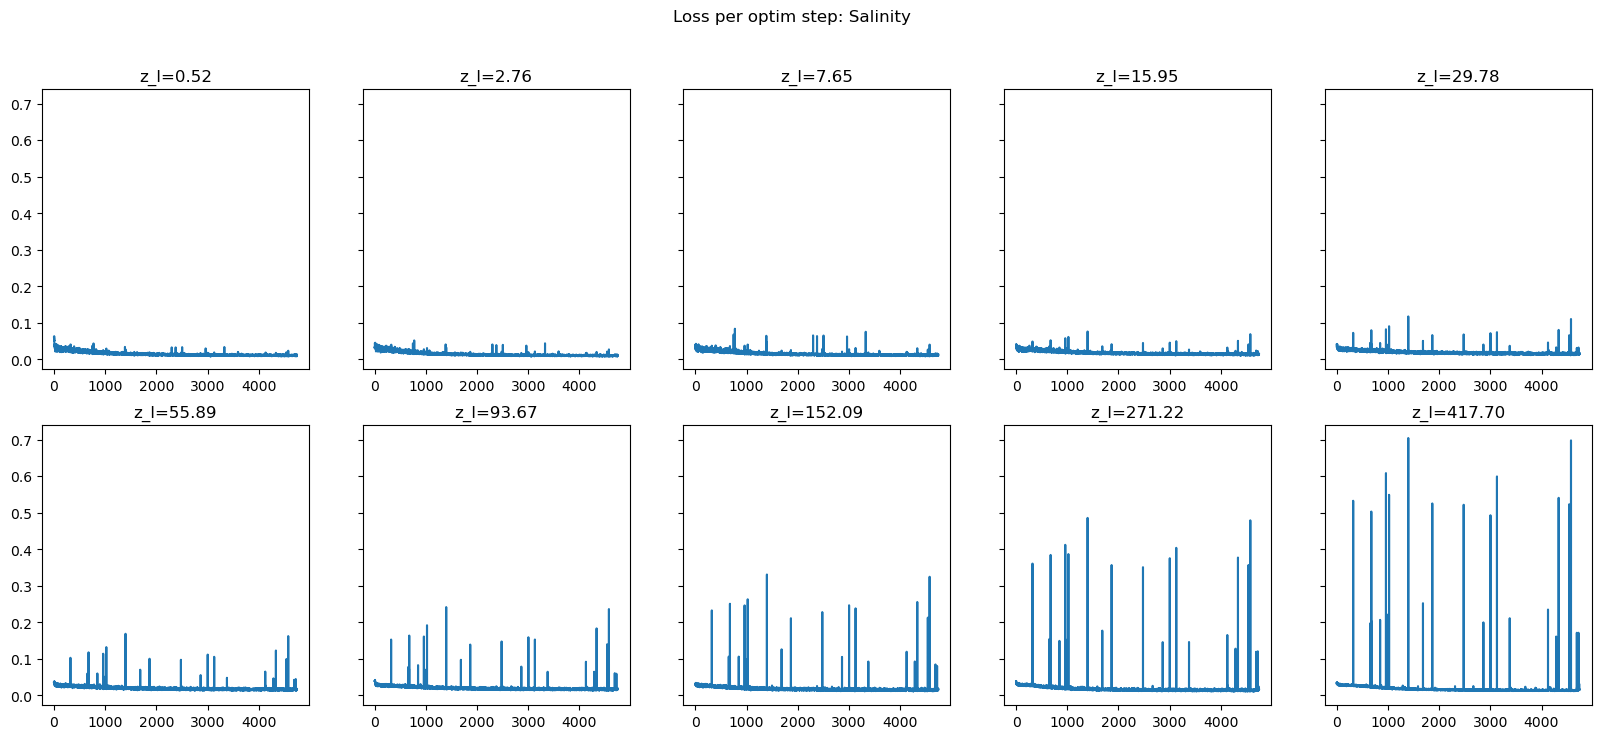

In [34]:
# plot --
var = "so"
extended_var = "salinity"
fig, ax = plot_loss_3d(var, extended_var)